# EDA 세션 강의자료 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 불러오기

- 현재 고객의 정보가 서로 다른 데이터셋들에 나뉘어져 있습니다.
- 데이터들을 전부 불러온 뒤 통합시켜봅시다.

### 고객 기본 정보 데이터

- 각 칼럼명으로 의미를 충분히 파악할 수 있기 떄문에 설명은 생략하겠습니다.

In [2]:
customer_master = pd.read_csv("customer_master.csv", index_col=0)
customer_master.head()

,customer_id,customer_name,registration_date,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,M,54,1965-08-05,울산광역시


### 상품데이터

- item_id: 상품의 고유번호
- item_name: 상품명
- item_price: 상품 가격

In [3]:
item_master = pd.read_csv("item_master.csv")
item_master

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


### 구매내역 데이터

- 특정 고객의 구매 이력 데이터인데 두개로 나뉘어져 있습니다.
- transaction_id: 거래 번호
- price: 거래액
- payment_date: 거래 일시
- customer_id: 고객명

In [4]:
transaction_1 = pd.read_csv("transaction_1.csv")
transaction_2 = pd.read_csv("transaction_2.csv")

In [5]:
print(transaction_1.shape)
transaction_1.head()

(5000, 4)


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [6]:
print(transaction_2.shape)
transaction_2.head()

(1786, 4)


,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


### 상세 구매내역 데이터

- 위의 구매내역의 세부정보를 담고 있는 데이터입니다.
- 어떤 상품을 몇개 구매했는지에 대한 정보가 담겨있습니다.

In [7]:
transaction_detail_1 = pd.read_csv("transaction_detail_1.csv")
transaction_detail_2 = pd.read_csv("transaction_detail_2.csv")

In [8]:
print(transaction_detail_1.shape)
transaction_detail_1.head()

(5000, 4)


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [9]:
print(transaction_detail_2.shape)
transaction_detail_2.head()

(2144, 4)


,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


# 2. 데이터 전처리

- 우선, 위의 데이터들을 결합시켜줍시다.
- 되도록 더 구체적이고 상세한 정보량이 담긴 데이터에 맞추어 데이터를 가공/통합 하는 것이 일반적입니다.
- 구매내역 데이터를 기준으로 데이터를 조인하겠습니다.

### 구매내역 데이터 결합

- 두개로 나뉘어진 구매내역 데이터를 vertical join (아래로 이어 붙임) 합시다.
- vertical join 은 결합할 데이터프레임들의 열 구조가 다른 경우 결측치가 발생하기 때문에 유의합시다.
- 판다스의 concat() 메소드를 사용합니다.

In [10]:
# combine transaction data
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)

In [11]:
print(transaction.shape)
transaction.head()

(6786, 4)


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [12]:
print(len(transaction))
print(len(transaction_1))
print(len(transaction_2))

6786
5000
1786


### 상세 구매내역 데이터 결합

- 상세 구매내역도 칼럼의 구조가 동일하기 때문에 마찬가지로 vertical join 해줍니다.

In [13]:
# combine transaction detail data
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [14]:
transaction_detail.shape

(7144, 4)

### 전체 구매내역 데이터 통합

- 위에서 정의한 "transaction" 데이터와 "transaction_detail" 데이터를 합쳐줍시다. 
- 이번에는 데이터들을 공통된 칼럼 ("transaction_id") 을 기준으로 횡적으로 결합시킵니다.
- 판다스의 merge 메소드를 이용합니다.

In [15]:
merged_data = pd.merge(transaction_detail, transaction.loc[:, ["transaction_id", "payment_date", "customer_id"]],
                      on="transaction_id", how="left")

In [16]:
merged_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [17]:
merged_data.shape

(7144, 6)

- 통합된 구매내역 데이터를 얻었습니다!

### 고객 데이터 추가

- 다음으로는 통합된 구매내역 데이터에 고객 데이터를 결합시키겠습니다
- 고객 번호 ("customer_id") 를 기준으로 결합합니다.

In [18]:
merged_data = pd.merge(merged_data, customer_master, on="customer_id", how="left")

In [19]:
merged_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,M,30,1989-07-15,대전광역시
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,M,73,1945-11-29,서울특별시
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,M,42,1977-05-17,광주광역시
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,F,47,1972-03-17,인천광역시
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,M,74,1944-12-17,광주광역시


### 상품 데이터 추가

- 마지막으로 상품데이터를 결합해줍시다.
- 상품명 ("item_id") 을 기준으로 결합합니다.

In [20]:
merged_data = pd.merge(merged_data, item_master, on="item_id", how="left")

In [21]:
merged_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,M,74,1944-12-17,광주광역시,PC-B,85000


In [22]:
# Final dataset to be used
df = merged_data.copy()

### 총판매액 칼럼 추가

- 현재 데이터에는 행 별로 특정 상품의 가격과 판매량이 있습니다. 이 두가지 정보를 이용해서 "총 판매액"을 추가해줍시다.

In [23]:
df["total_sales"] = df["quantity"] * df["item_price"]

In [24]:
df.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,gender,age,birth,pref,item_name,item_price,total_sales
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,M,30,1989-07-15,대전광역시,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,M,73,1945-11-29,서울특별시,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,M,42,1977-05-17,광주광역시,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,F,47,1972-03-17,인천광역시,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,M,74,1944-12-17,광주광역시,PC-B,85000,170000


# 3. EDA

- 이제 본격적으로 EDA 라는 걸 해봅시다.
- 열린 마음과 지적 호기심을 바탕으로 이것저것 시도해보면서 데이터에서 얻을 수 있는 모든 것을 뽑아내는 것이 EDA라고 생각합니다.
- EDA는 별도로 정해진 공식이 없습니다. 데이터의 특징을 고려해 기초 통계량부터 그룹 별로 데이터 집계를 해보고, 또 후에 머신러닝 기법들도 적용하면서 다양한 인사이트를 뽑아보도록 하겠습니다.

## Basic statistics

In [25]:
# 결측치 확인
df.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
total_sales          0
dtype: int64

In [26]:
from pandas_profiling import ProfileReport

ProfileReport(df)

- 판다스의 프로파일링 리포트를 사용하면 편하긴 하지만, 이것만으로 파악하기 어려운 정보도 많으니 주의하세요!

In [27]:
# 수치형 자료들에 대해 기술 통계량 파악
df.describe()

,detail_id,quantity,age,item_price,total_sales
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


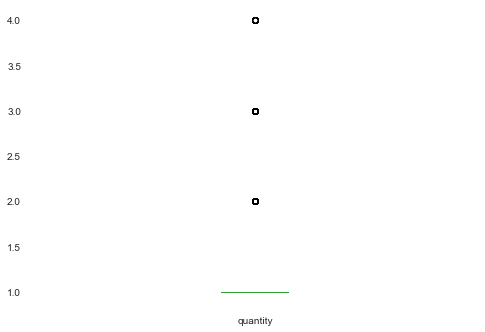

In [28]:
df.quantity.plot(kind="box")
plt.show()

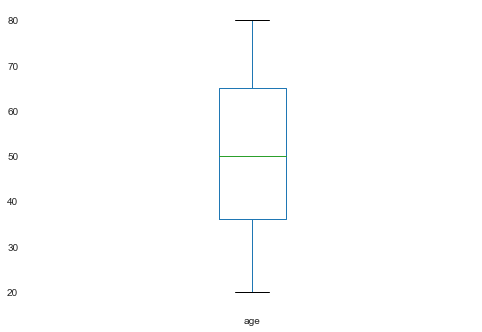

In [29]:
df.age.plot(kind="box")
plt.show()

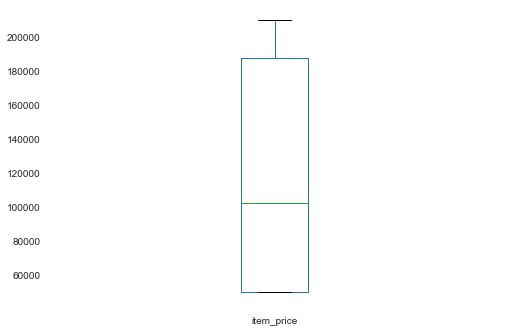

In [30]:
df.item_price.plot(kind="box")
plt.show()

In [31]:
# 날짜 최대/최소 값
print(df.payment_date.min())
print(df.payment_date.max())

2019-02-01 01:36:57
2019-07-31 23:41:38


## 4. Monthly Analysis

- 현재 데이터를 보시면, payment_date 칼럼에 날짜 자료가 문자열 자료형으로 표현되어 있습니다.
- 날짜 자료를 datetime 자료형으로 변환한 뒤, 월 별로 집계해 특징값들을 파악해보도록 하겠습니다.

In [32]:
# 날짜 자료형 변환
df["payment_date"] = pd.to_datetime(df["payment_date"])

In [33]:
# Create new column indicating the month of payment
df["payment_month"] = df["payment_date"].dt.strftime("%Y%m")
del df["payment_date"]

- dt.strftime() 함수를 사용하면 날짜 자료를 특정한 포맷으로 뽑아낼 수 있습니다.
- 위에서는 연/월 에 대한 정보만 뽑아내 새로운 칼럼을 작성했습니다.

In [34]:
df.head()

,detail_id,transaction_id,item_id,quantity,customer_id,customer_name,registration_date,gender,age,birth,pref,item_name,item_price,total_sales,payment_month
0,0,T0000000113,S005,1,PL563502,김태경,2019-01-07 14:34,M,30,1989-07-15,대전광역시,PC-E,210000,210000,201902
1,1,T0000000114,S001,1,HD678019,김영웅,2019-01-27 18:00,M,73,1945-11-29,서울특별시,PC-A,50000,50000,201902
2,2,T0000000115,S003,1,HD298120,김강현,2019-01-11 8:16,M,42,1977-05-17,광주광역시,PC-C,120000,120000,201902
3,3,T0000000116,S005,1,IK452215,김주한,2019-01-10 5:07,F,47,1972-03-17,인천광역시,PC-E,210000,210000,201902
4,4,T0000000117,S002,2,PL542865,김영빈,2019-01-25 6:46,M,74,1944-12-17,광주광역시,PC-B,85000,170000,201902


In [35]:
# 월별 집계
df.groupby("payment_month").sum()

,detail_id,quantity,age,item_price,total_sales
payment_month,,,,,
201902,676866,1403,59279,142805000,160185000
201903,2071474,1427,58996,142980000,160370000
201904,3476816,1421,59246,143670000,160510000
201905,4812795,1390,58195,139655000,155420000
201906,6369999,1446,61070,147090000,164030000
201907,8106846,1485,62312,153215000,170620000


- 판다스의 groupby 메소드를 사용해 연월 별로 자료들을 집계했습니다.
- 집계된 자료를 바탕으로 시도표를 그려봅시다.

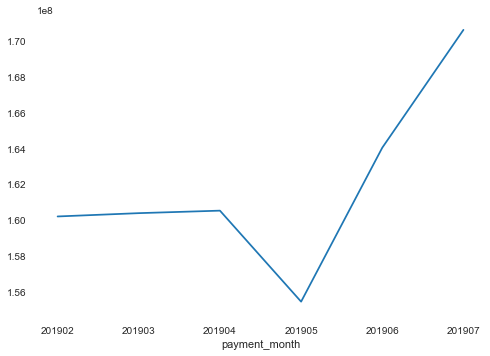

In [36]:
# Time Series Plot of monthly payment
df.groupby("payment_month").sum().total_sales.plot()
plt.show()

In [37]:
# 월별 & 상품명으로 집계
df.groupby(["payment_month", "item_name"]).sum()[["total_sales", "quantity"]]

total_sales  quantity
payment_month item_name                       
201902        PC-A          24150000       483
              PC-B          25245000       297
              PC-C          19800000       165
              PC-D          31140000       173
              PC-E          59850000       285
201903        PC-A          26000000       520
              PC-B          25500000       300
              PC-C          19080000       159
              PC-D          25740000       143
              PC-E          64050000       305
201904        PC-A          25900000       518
              PC-B          23460000       276
              PC-C          21960000       183
              PC-D          24300000       135
              PC-E          64890000       309
201905        PC-A          24850000       497
              PC-B          25330000       298
              PC-C          20520000       171
              PC-D          25920000       144
              PC-E          58800000       280
201906        PC-A          26000000       520
              PC-B          23970000       282
              PC-C          21840000       182
              PC-D          28800000       160
              PC-E          63420000       302
201907        PC-A          25250000       505
              PC-B          28220000       332
              PC-C          19440000       162
              PC-D          26100000       145
              PC-E          71610000       341

- groupby 메소드로 집계했더니 살짝 보기가 불편하네요. 이렇게 두개의 키를 바탕으로 집계하고 싶은 경우에 피벗 테이블을 이용하면 편합니다.

In [38]:
# Make pivot table
pd.pivot_table(df, index = "item_name", columns = "payment_month", 
               values = ["total_sales", "quantity"], aggfunc = "sum")

quantity                                    total_sales  \
payment_month   201902 201903 201904 201905 201906 201907      201902   
item_name                                                               
PC-A               483    520    518    497    520    505    24150000   
PC-B               297    300    276    298    282    332    25245000   
PC-C               165    159    183    171    182    162    19800000   
PC-D               173    143    135    144    160    145    31140000   
PC-E               285    305    309    280    302    341    59850000   

                                                                 
payment_month    201903    201904    201905    201906    201907  
item_name                                                        
PC-A           26000000  25900000  24850000  26000000  25250000  
PC-B           25500000  23460000  25330000  23970000  28220000  
PC-C           19080000  21960000  20520000  21840000  19440000  
PC-D           25740000  24300000  25920000  28800000  26100000  
PC-E           64050000  64890000  58800000  63420000  71610000

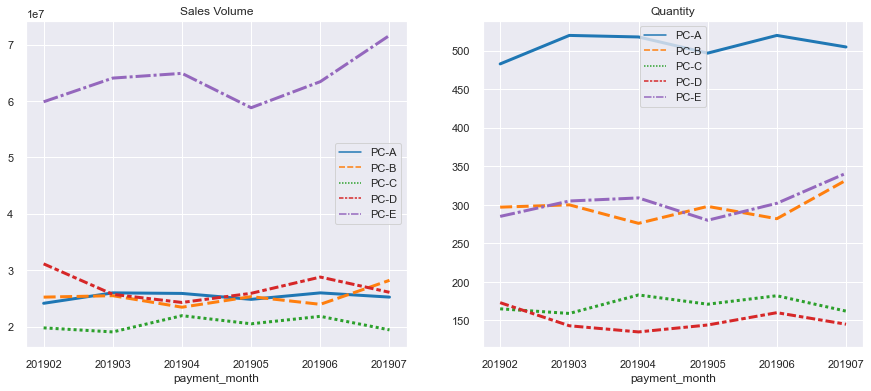

In [39]:
# Visualization

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15, 6)})


pivot_table_price = pd.pivot_table(df, index = "payment_month", columns = "item_name", 
                                   values = "total_sales", aggfunc = "sum")
pivot_table_quantity = pd.pivot_table(df, index = "payment_month", columns = "item_name", 
                                   values = "quantity", aggfunc = "sum")

fig, ax = plt.subplots(1,2)
sns.lineplot(data = pivot_table_price, palette = "tab10", linewidth = 3, ax = ax[0]).set_title("Sales Volume")
sns.lineplot(data = pivot_table_quantity, palette = "tab10", linewidth = 3, ax = ax[1]).set_title("Quantity")
plt.show()